In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [2]:
df = pd.read_csv('final_data.csv')

unnecessary_vars = [
    'packages', 'screenshots', 'movies', 'score_rank', 'header_image',
    'reviews', 'website', 'support_url', 'notes', 'support_email',
    'recommendations', 'user_score', 'median_playtime_forever',
    'median_playtime_2weeks', 'required_age', 'metacritic_score',
    'metacritic_url', 'peak_ccu', 'positive', 'negative'
]

# Drop unnecessary variables
df = df.drop(columns=unnecessary_vars)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      97404 non-null  object 
 1   release_date              97410 non-null  object 
 2   price                     97410 non-null  float64
 3   dlc_count                 97410 non-null  int64  
 4   detailed_description      92562 non-null  object 
 5   about_the_game            92540 non-null  object 
 6   short_description         92631 non-null  object 
 7   windows                   97410 non-null  bool   
 8   mac                       97410 non-null  bool   
 9   linux                     97410 non-null  bool   
 10  achievements              97410 non-null  int64  
 11  supported_languages       97410 non-null  object 
 12  full_audio_languages      97410 non-null  object 
 13  developers                97410 non-null  object 
 14  publis

In [4]:
#remove rows where tags is like '[]'
df = df[df['tags'] != '[]']
print(df.info())
# tags are available in a dictionary with key as tag and value as an integer
# we will convert this to a list of tags
df['tags'] = df['tags'].apply(lambda x: list(eval(x).keys()))
print(df['tags'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 67647 entries, 0 to 97403
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      67647 non-null  object 
 1   release_date              67647 non-null  object 
 2   price                     67647 non-null  float64
 3   dlc_count                 67647 non-null  int64  
 4   detailed_description      67578 non-null  object 
 5   about_the_game            67561 non-null  object 
 6   short_description         67633 non-null  object 
 7   windows                   67647 non-null  bool   
 8   mac                       67647 non-null  bool   
 9   linux                     67647 non-null  bool   
 10  achievements              67647 non-null  int64  
 11  supported_languages       67647 non-null  object 
 12  full_audio_languages      67647 non-null  object 
 13  developers                67647 non-null  object 
 14  publishers 

In [5]:
# Fields with missing values
def is_empty(cell):
    if isinstance(cell, list):
        return len(cell) == 0
    elif isinstance(cell, str):
        return cell == '' or cell == '[]'
    else:
        return pd.isna(cell)
print(df.map(is_empty).sum())

name                            0
release_date                    0
price                           0
dlc_count                       0
detailed_description           69
about_the_game                 86
short_description              14
windows                         0
mac                             0
linux                           0
achievements                    0
supported_languages            18
full_audio_languages        37482
developers                      0
publishers                      0
categories                    947
genres                         68
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
tags                            0
aggregate_score                 0
dtype: int64


In [6]:
df = df[df['categories'] != '[]']
df = df[df['genres'] != '[]']
df = df[df['about_the_game'].isna() == False]
df = df[df['short_description'].isna() == False]
df = df[df['supported_languages'] != '[]']
print(df.map(is_empty).sum())
df.info()

name                            0
release_date                    0
price                           0
dlc_count                       0
detailed_description            0
about_the_game                  0
short_description               0
windows                         0
mac                             0
linux                           0
achievements                    0
supported_languages             0
full_audio_languages        36713
developers                      0
publishers                      0
categories                      0
genres                          0
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
tags                            0
aggregate_score                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 66543 entries, 0 to 97403
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                

In [7]:
#store data in a new csv file
df.to_csv('final_data_cleaned.csv', index=False)

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')

In [9]:
print(df.describe())

                        release_date         price     dlc_count  \
count                          66543  66543.000000  66543.000000   
mean   2019-11-15 01:14:57.687209728      7.951321      0.645462   
min              1997-06-30 00:00:00      0.000000      0.000000   
25%              2017-12-29 00:00:00      1.990000      0.000000   
50%              2020-04-08 00:00:00      4.990000      0.000000   
75%              2022-02-10 00:00:00      9.990000      0.000000   
max              2024-08-31 00:00:00    999.000000   2366.000000   
std                              NaN     10.609264     15.474093   

       achievements  average_playtime_forever  average_playtime_2weeks  \
count  66543.000000              66543.000000             66543.000000   
mean      24.002825                124.284944                13.662970   
min        0.000000                  0.000000                 0.000000   
25%        0.000000                  0.000000                 0.000000   
50%        6.0000

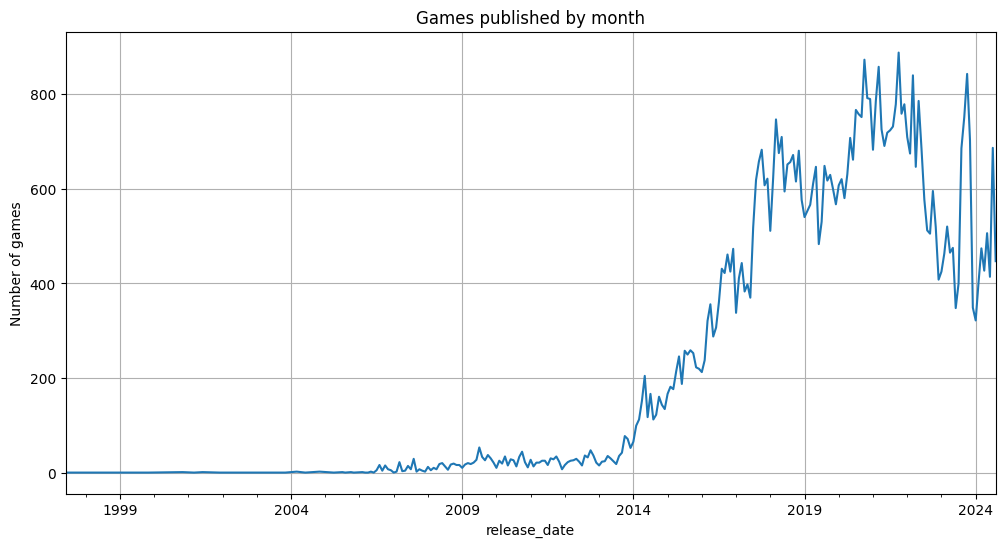

In [10]:
# Number of games published by month
plt.figure(figsize=(12, 6))
df.groupby(df['release_date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

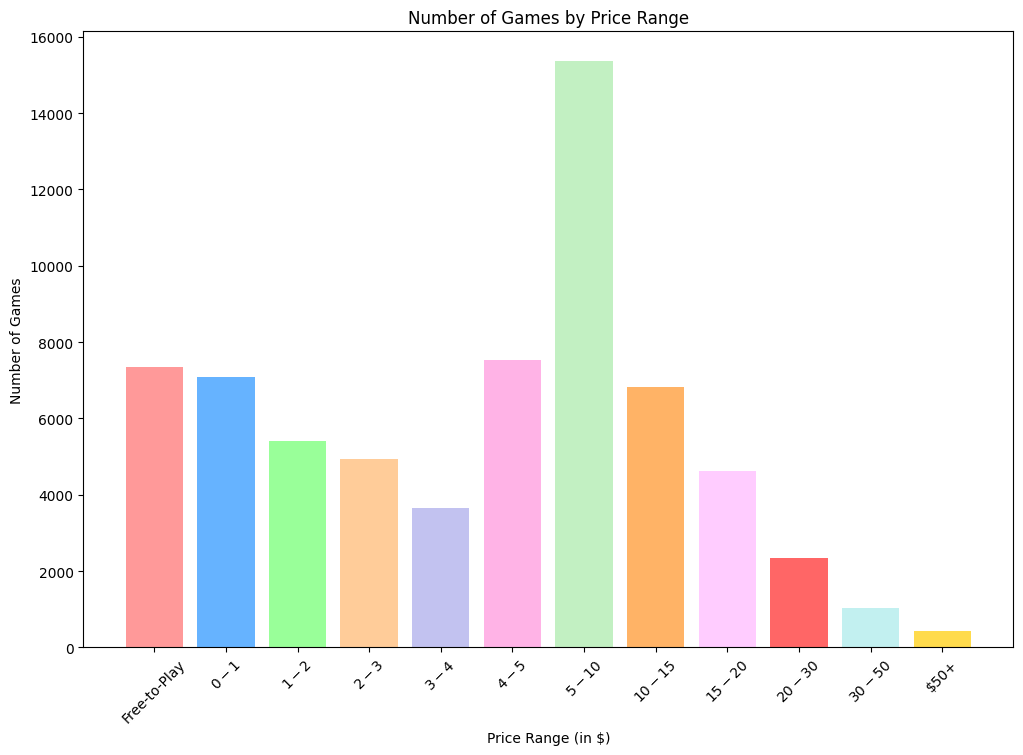

In [11]:
# Initialize a dictionary to hold the price range counts
price_ranges = {
    'Free-to-Play': 0,
    '$0-$1': 0,
    '$1-$2': 0,
    '$2-$3': 0,
    '$3-$4': 0,
    '$4-$5': 0,
    '$5-$10': 0,
    '$10-$15': 0,
    '$15-$20': 0,
    '$20-$30': 0,
    '$30-$50': 0,
    '$50+': 0,
}

# Iterate through the DataFrame to categorize the prices
for index, row in df.iterrows():
    price = row['price']
    if price == 0.0:
        price_ranges['Free-to-Play'] += 1
    elif price < 1:
        price_ranges['$0-$1'] += 1
    elif price < 2:
        price_ranges['$1-$2'] += 1
    elif price < 3:
        price_ranges['$2-$3'] += 1
    elif price < 4:
        price_ranges['$3-$4'] += 1
    elif price < 5:
        price_ranges['$4-$5'] += 1
    elif price < 10:
        price_ranges['$5-$10'] += 1
    elif price < 15:
        price_ranges['$10-$15'] += 1
    elif price < 20:
        price_ranges['$15-$20'] += 1
    elif price < 30:
        price_ranges['$20-$30'] += 1
    elif price < 50:
        price_ranges['$30-$50'] += 1
    else:
        price_ranges['$50+'] += 1

# Convert the dictionary to a DataFrame for plotting
price_ranges_df = pd.DataFrame(list(price_ranges.items()), columns=['Price Range', 'Number of Games'])

# Set the color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb366',
          '#ffccff','#ff6666','#c2f0f0','#ffdb4d']

# Plotting the results
plt.figure(figsize=(12, 8))
plt.bar(price_ranges_df['Price Range'], price_ranges_df['Number of Games'], color=colors)
plt.xlabel('Price Range (in $)')
plt.ylabel('Number of Games')
plt.title('Number of Games by Price Range')
plt.xticks(rotation=45)
plt.show()
# bins = range(0, 100, 5)
# plt.figure(figsize=(10, 6))
# plt.hist(df['price'], bins=bins, edgecolor='black')
# plt.title('Distribution of game prices')
# plt.xlabel('Price')
# plt.ylabel('Number of games')
# plt.show()

In [12]:
# Proportion of free games
round(df[df['price'] == 0].shape[0] / df.shape[0], 2) * 100

11.0

In [13]:
# Games with a price over $100
df[df['price'] > 100].shape[0]

28

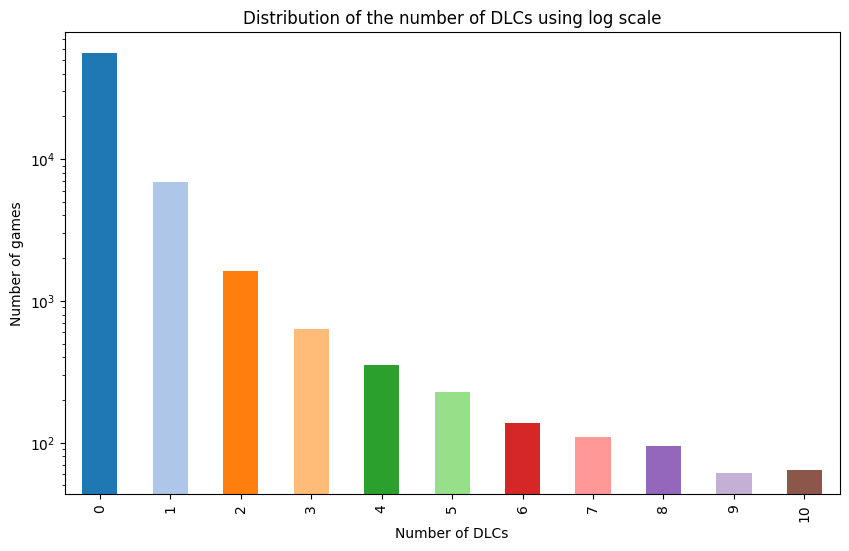

In [14]:
# Number of DLCs (up to 10)
dlc_counts = df['dlc_count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Distribution of the number of DLCs using log scale')
plt.yscale('log')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

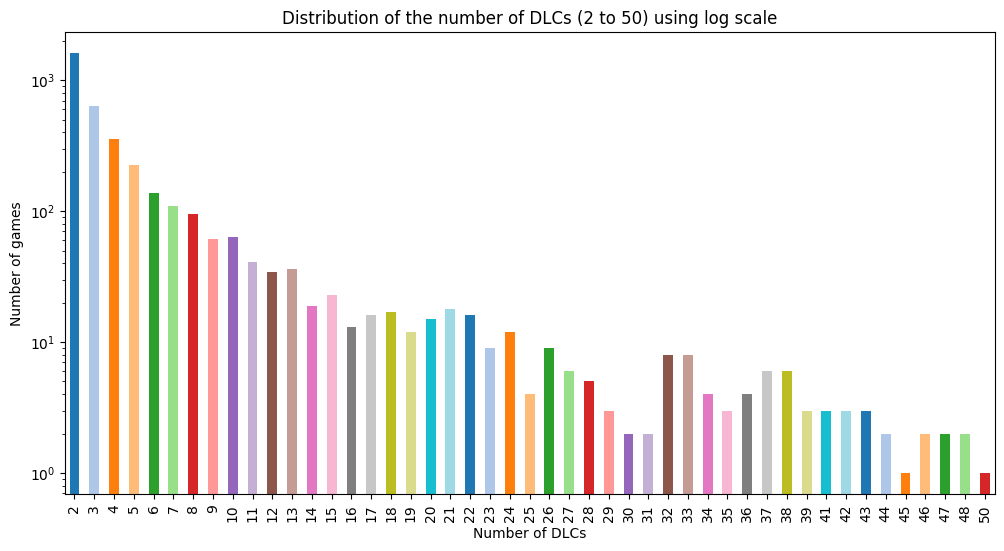

In [15]:
# Distribution of the number of DLCs (2 to 50)
dlc_counts = df['dlc_count'].value_counts().sort_index()
dlc_counts = dlc_counts[(dlc_counts.index >= 2) & (dlc_counts.index <= 50)]
plt.figure(figsize=(12, 6))
dlc_counts.plot(kind='bar', color=plt.cm.tab20.colors)
plt.yscale('log')
plt.title('Distribution of the number of DLCs (2 to 50) using log scale')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

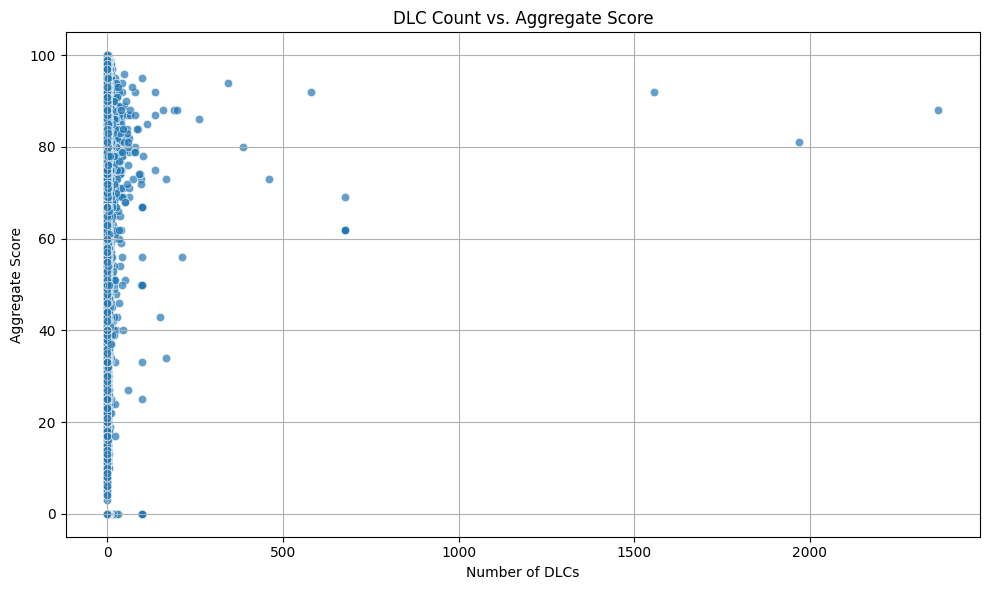

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dlc_count', y='aggregate_score', alpha=0.7)
plt.title('DLC Count vs. Aggregate Score')
plt.xlabel('Number of DLCs')
plt.ylabel('Aggregate Score')
plt.grid()
plt.tight_layout()
plt.show()

In [17]:
# Maximum number of DLCs
df['dlc_count'].max()

2366

In [18]:
from wordcloud import WordCloud, STOPWORDS

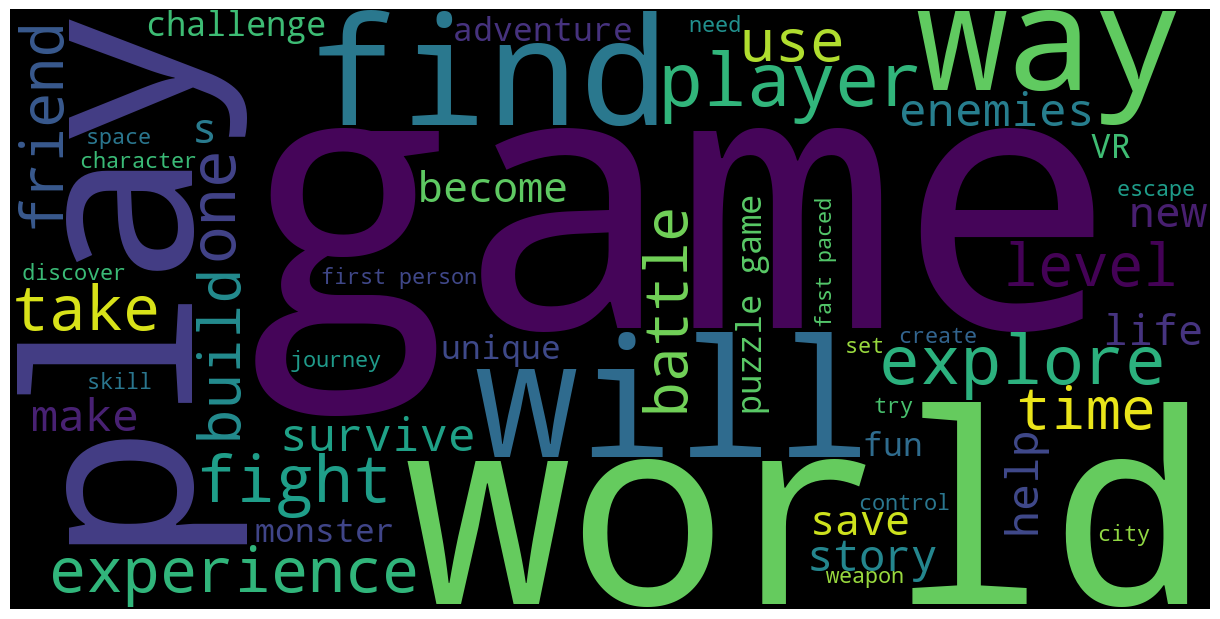

In [19]:
all_descriptions = ','.join(list(df['short_description'].values))
wordcloud = WordCloud(width = 1200, height = 600, max_words=50).generate(all_descriptions)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

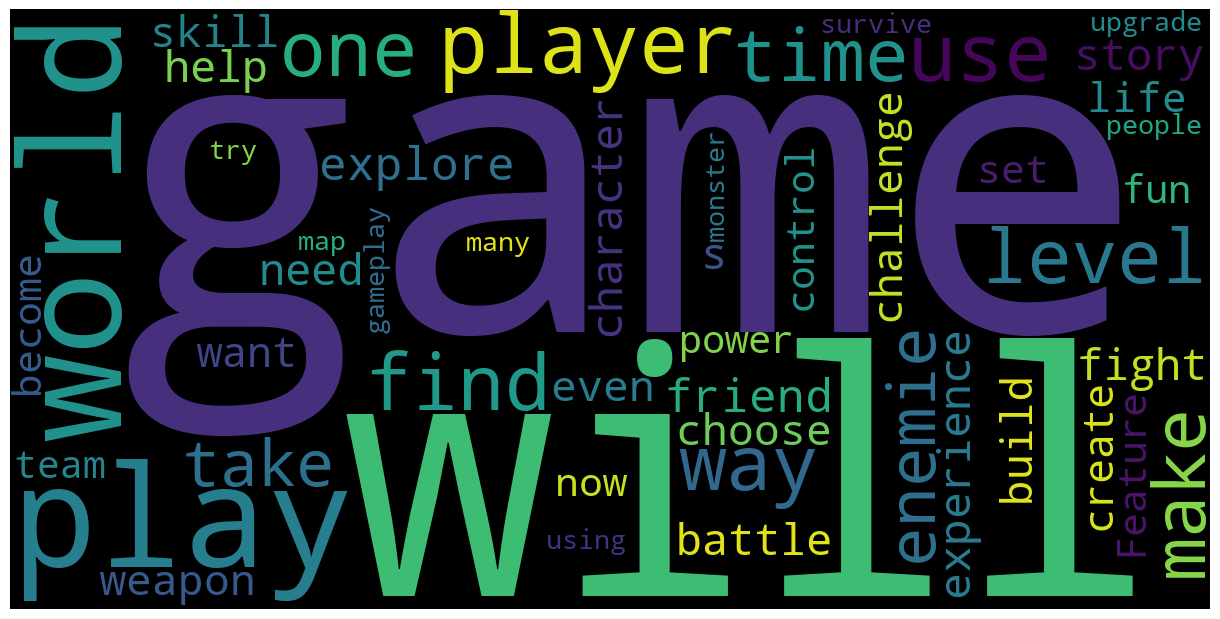

In [20]:
# Wordcloud: about_the_game
all_descriptions = ','.join(list(df['about_the_game'].values))
wordcloud = WordCloud(width = 1200, height = 600, max_words=50).generate(all_descriptions)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

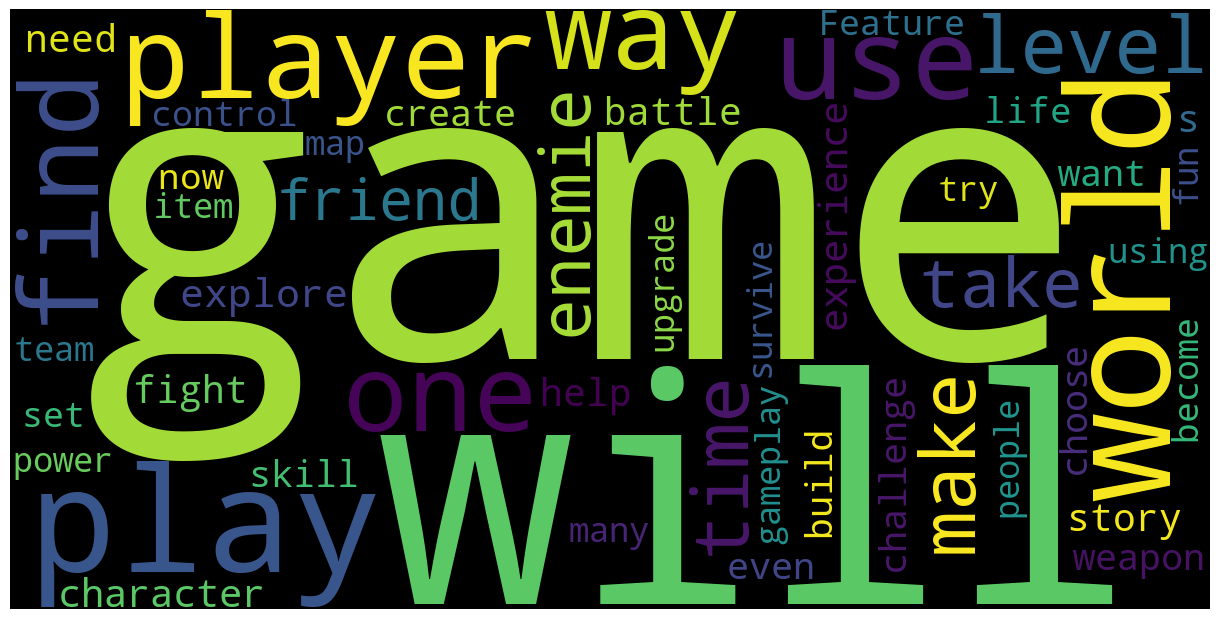

In [21]:
# Wordcloud: detailed_description
all_descriptions = ','.join(list(df['detailed_description'].values))
wordcloud = WordCloud(width = 1200, height = 600, max_words=50).generate(all_descriptions)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

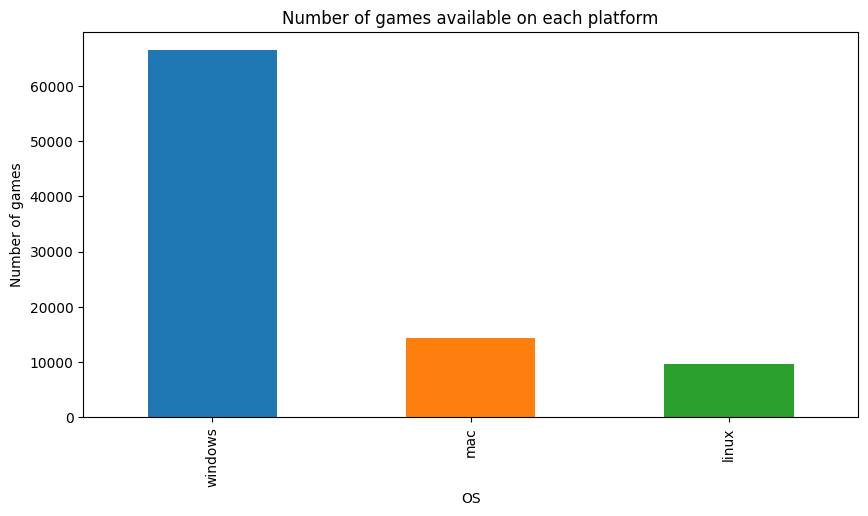

In [22]:
# OS support
platform_sums = df[['windows', 'mac', 'linux']].sum()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(10, 5))
platform_sums.plot(kind='bar', color=colors)
plt.title('Number of games available on each platform')
plt.xlabel('OS')
plt.ylabel('Number of games')
plt.show()

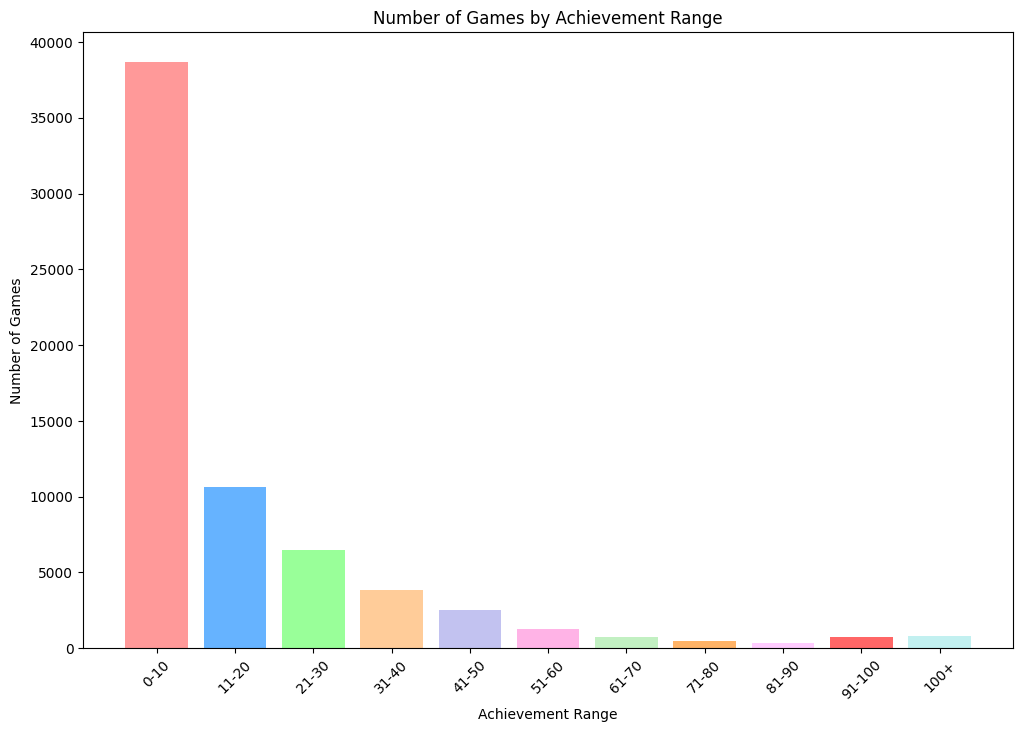

In [23]:
# Achievements (limited to 150)
ach_ranges = {
    '0-10': 0,
    '11-20': 0,
    '21-30': 0,
    '31-40': 0,
    '41-50': 0,
    '51-60': 0,
    '61-70': 0,
    '71-80': 0,
    '81-90': 0,
    '91-100': 0,
    '100+': 0
}

for index, row in df.iterrows():
    achievements = row['achievements']
    if achievements <= 10:
        ach_ranges['0-10'] += 1
    elif achievements <= 20:
        ach_ranges['11-20'] += 1
    elif achievements <= 30:
        ach_ranges['21-30'] += 1
    elif achievements <= 40:
        ach_ranges['31-40'] += 1
    elif achievements <= 50:
        ach_ranges['41-50'] += 1
    elif achievements <= 60:
        ach_ranges['51-60'] += 1
    elif achievements <= 70:
        ach_ranges['61-70'] += 1
    elif achievements <= 80:
        ach_ranges['71-80'] += 1
    elif achievements <= 90:
        ach_ranges['81-90'] += 1
    elif achievements <= 100:
        ach_ranges['91-100'] += 1
    else:
        ach_ranges['100+'] += 1

ach_ranges_df = pd.DataFrame(list(ach_ranges.items()), columns=['Achievement Range', 'Number of Games'])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb366',
          '#ffccff','#ff6666','#c2f0f0','#ffdb4d']

plt.figure(figsize=(12, 8))
plt.bar(ach_ranges_df['Achievement Range'], ach_ranges_df['Number of Games'], color=colors)
plt.xlabel('Achievement Range')
plt.ylabel('Number of Games')
plt.title('Number of Games by Achievement Range')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Proportion of games with 0 achievements
count_of_zero_achievements = (df['achievements'] == 0).sum()
total_rows = len(df)
round(count_of_zero_achievements / total_rows, 2)

0.44

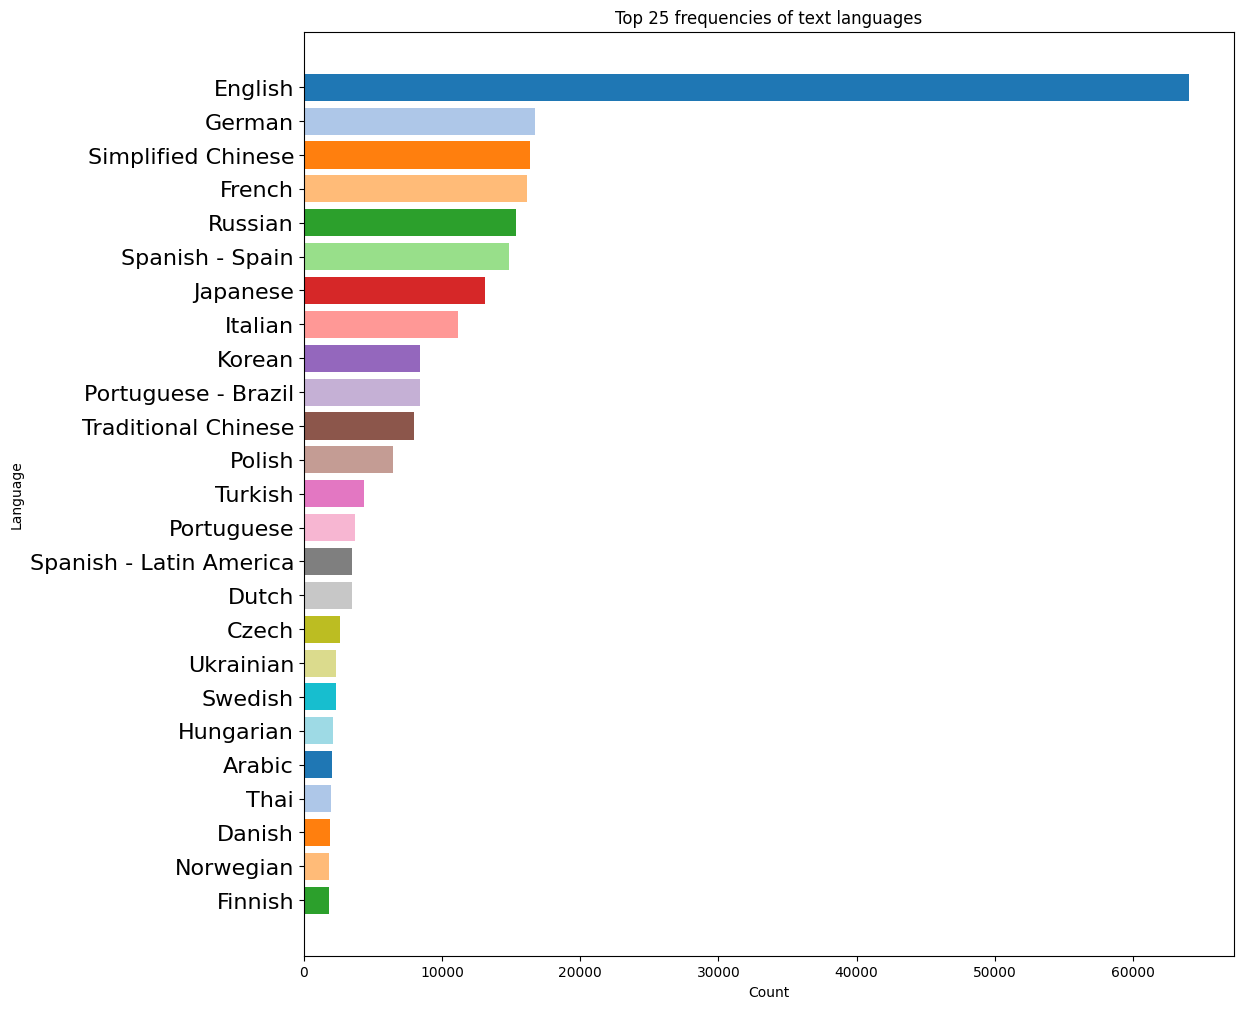

In [25]:
from collections import Counter
# Text languages (top 25)
all_languages = []
#remove the brackets and quotes from the supported_languages column
df['supported_languages'] = df['supported_languages'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for languages in df['supported_languages']:
    all_languages.extend(languages.split(', '))
language_counts = Counter(all_languages)
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values('Count', ascending=False)
top_lang_df = lang_df.head(25)
plt.figure(figsize=(12, 12))
plt.barh(top_lang_df['Language'], top_lang_df['Count'], color=plt.cm.tab20.colors)
plt.title('Top 25 frequencies of text languages')
plt.ylabel('Language')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

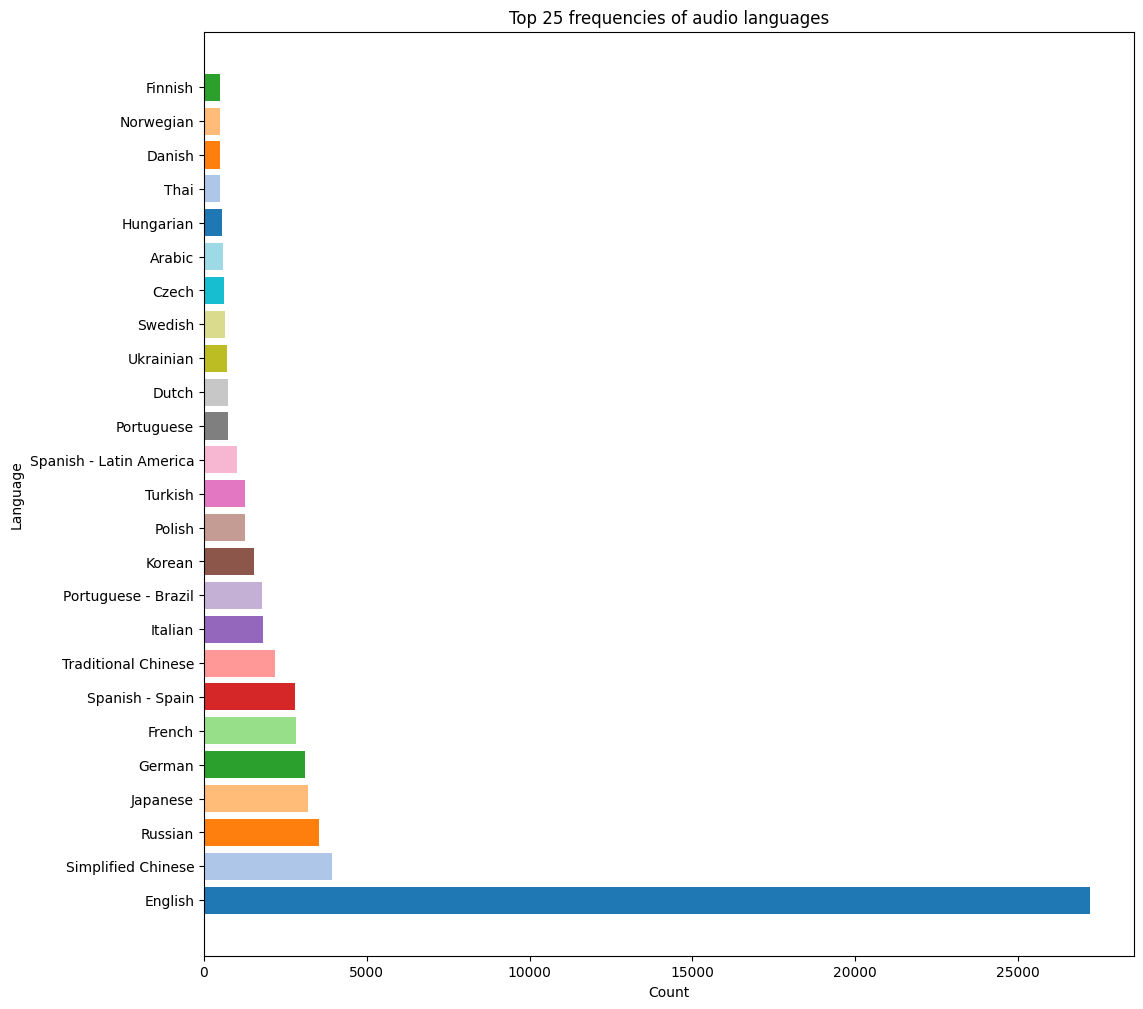

In [26]:
#Audio Languages
all_languages = []

df['full_audio_languages'] = df['full_audio_languages'].str.replace('[', '').str.replace(']', '').str.replace("'", '')

for languages in df['full_audio_languages']:
    all_languages.extend(languages.split(', '))
# Remove empty strings
all_languages = [lang for lang in all_languages if lang != '']
language_counts = Counter(all_languages)
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values('Count', ascending=False)
top_lang_df = lang_df.head(25)
plt.figure(figsize=(12, 12))
plt.barh(top_lang_df['Language'], top_lang_df['Count'], color=plt.cm.tab20.colors)
plt.title('Top 25 frequencies of audio languages')
plt.ylabel('Language')
plt.xlabel('Count')
plt.show()


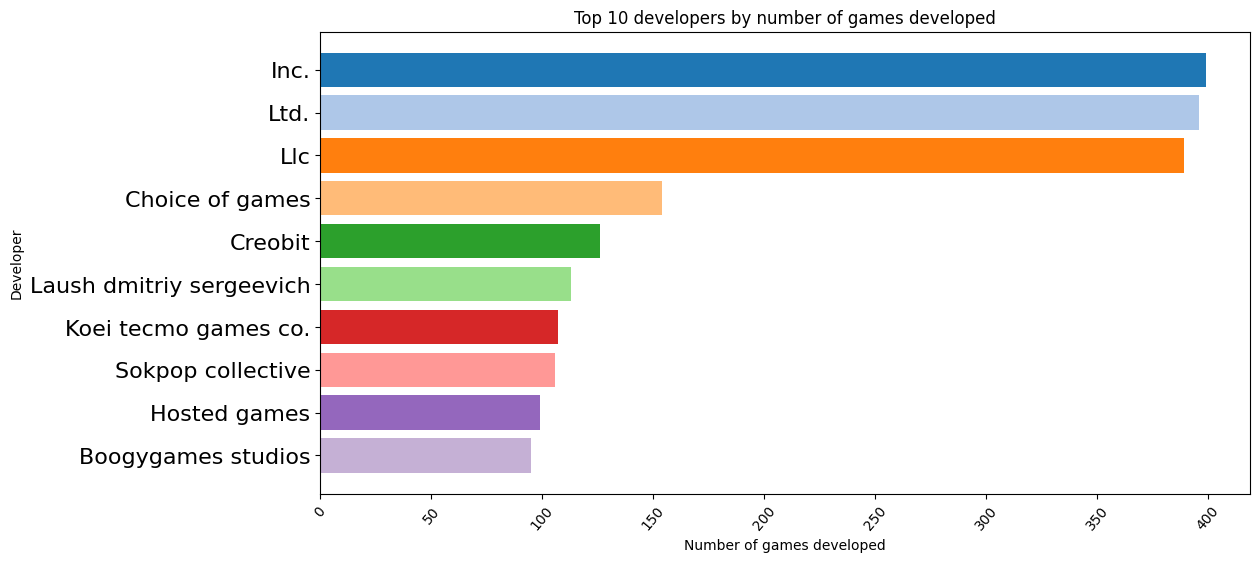

In [27]:
all_developers = []
df['developers'] = df['developers'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for developers in df['developers']:
    all_developers.extend(developers.split(', '))
# Capitalize each string so that the same developer is not counted twice
all_developers = [developer.strip().capitalize() for developer in all_developers]
developer_counts = Counter(all_developers)
top_developers = pd.DataFrame(developer_counts.most_common(10), columns=['Developer', 'Games Developed'])
plt.figure(figsize=(12, 6))
plt.barh(top_developers['Developer'], top_developers['Games Developed'], color=plt.cm.tab20.colors)
plt.title('Top 10 developers by number of games developed')
plt.ylabel('Developer')
plt.xlabel('Number of games developed')
plt.xticks(rotation=50)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

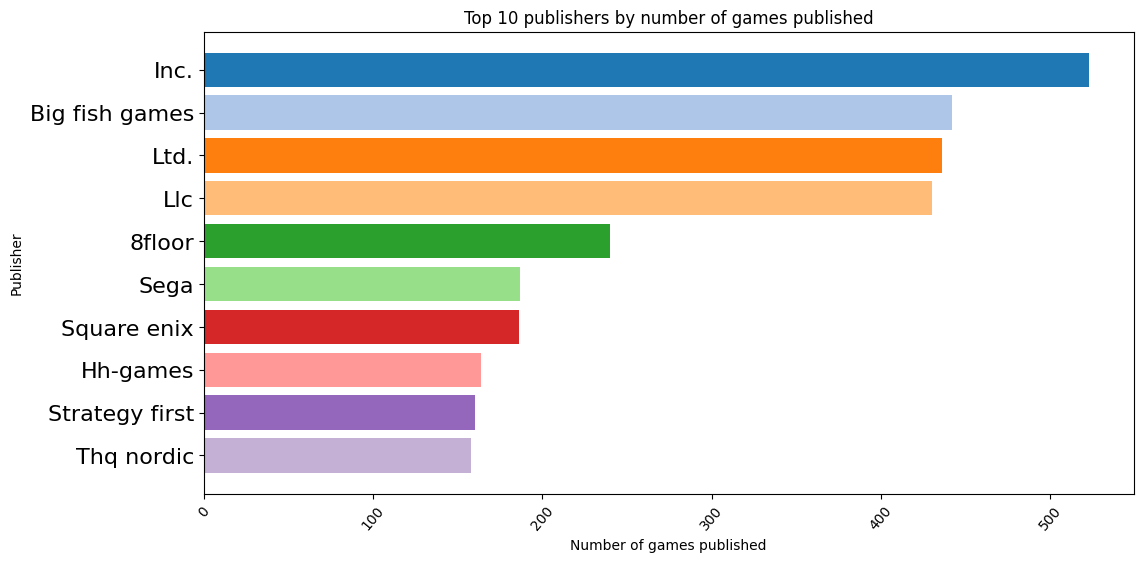

In [28]:
all_publishers = []
df['publishers'] = df['publishers'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for publishers in df['publishers']:
    all_publishers.extend(publishers.split(', '))
# Remove empty strings
all_publishers = [publisher for publisher in all_publishers if publisher != '']
all_publishers = [publisher.strip().capitalize() for publisher in all_publishers]
publisher_counts = Counter(all_publishers)
top_publishers = pd.DataFrame(publisher_counts.most_common(10), columns=['Publisher', 'Games Published'])
plt.figure(figsize=(12, 6))
plt.barh(top_publishers['Publisher'], top_publishers['Games Published'], color=plt.cm.tab20.colors)
plt.title('Top 10 publishers by number of games published')
plt.ylabel('Publisher')
plt.xlabel('Number of games published')
plt.xticks(rotation=50)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

In [29]:
all_developers = [dev for sublist in df['developers'].dropna() for dev in sublist]
len(set(all_developers))

1937

In [30]:
# Total number of publishers
all_publishers = [dev for sublist in df['publishers'].dropna() for dev in sublist]
len(set(all_publishers))

1719

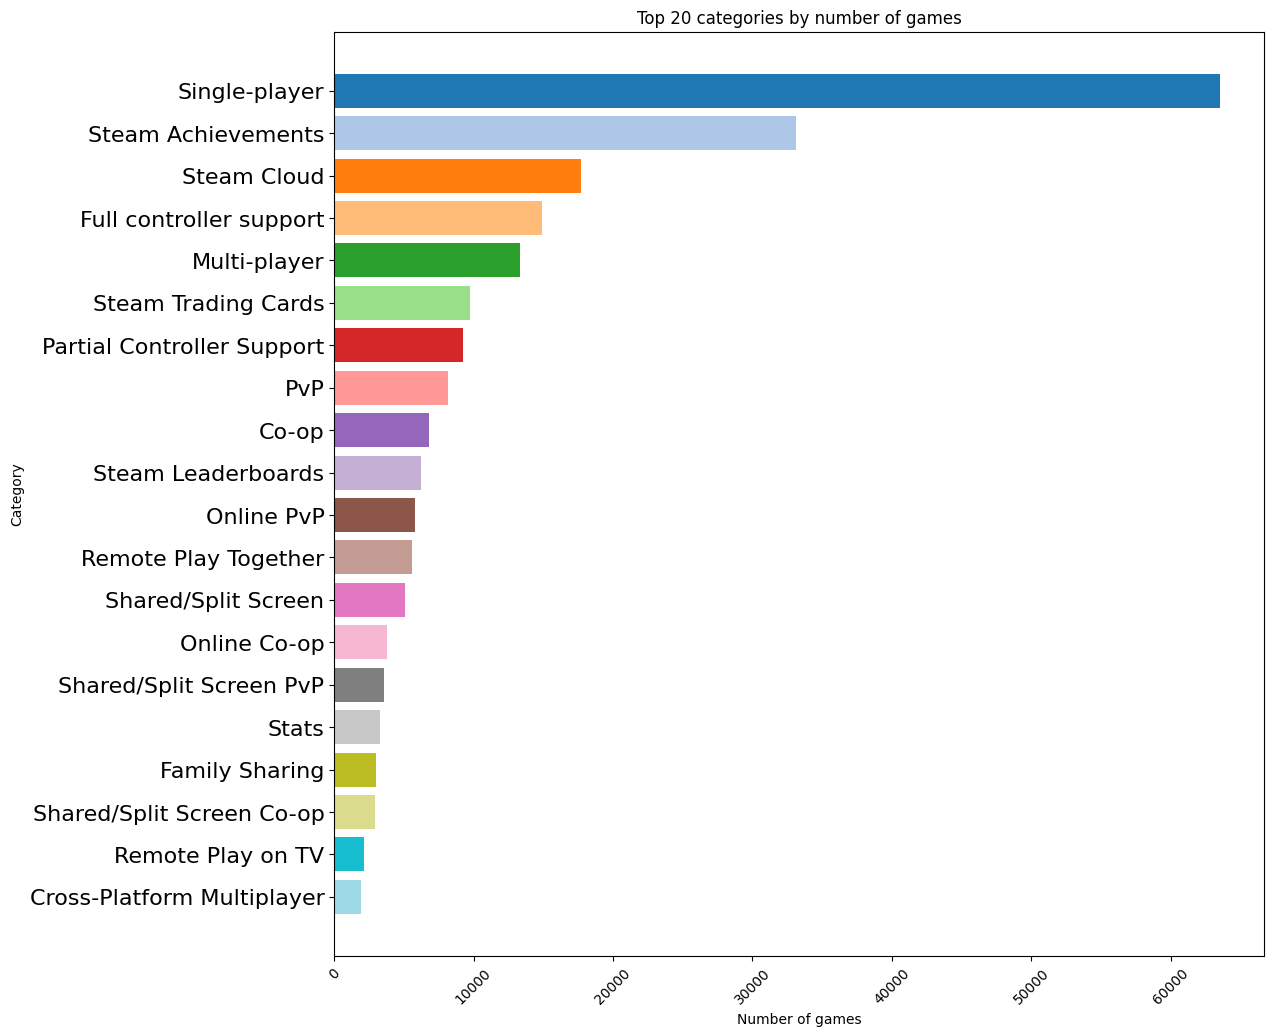

In [31]:
all_categories = []
df['categories'] = df['categories'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for categories in df['categories']:
    all_categories.extend(categories.split(', '))
# Remove empty strings
all_categories = [category for category in all_categories if category != '']
category_counts = Counter(all_categories)
top_categories = pd.DataFrame(category_counts.most_common(20), columns=['Category', 'Games'])
plt.figure(figsize=(12, 12))
plt.barh(top_categories['Category'], top_categories['Games'], color=plt.cm.tab20.colors)
plt.title('Top 20 categories by number of games')
plt.ylabel('Category')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

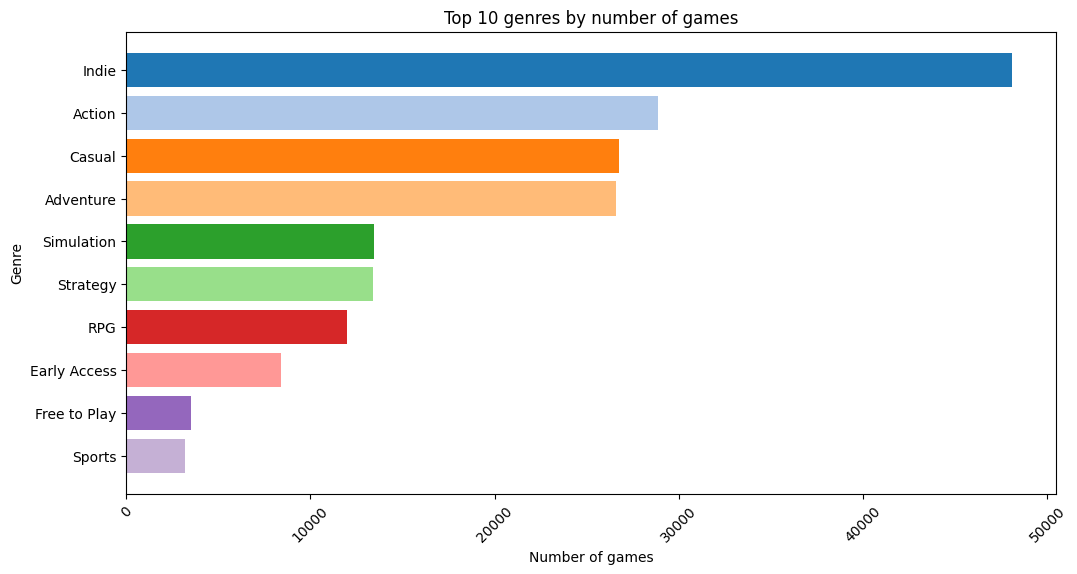

In [32]:
all_genres = []
df['genres'] = df['genres'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for genres in df['genres']:
    all_genres.extend(genres.split(', '))
# Remove empty strings
all_genres = [genre for genre in all_genres if genre != '']
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_genres['Genre'], top_genres['Number of Games'], color=plt.cm.tab20.colors)
plt.title('Top 10 genres by number of games')
plt.ylabel('Genre')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

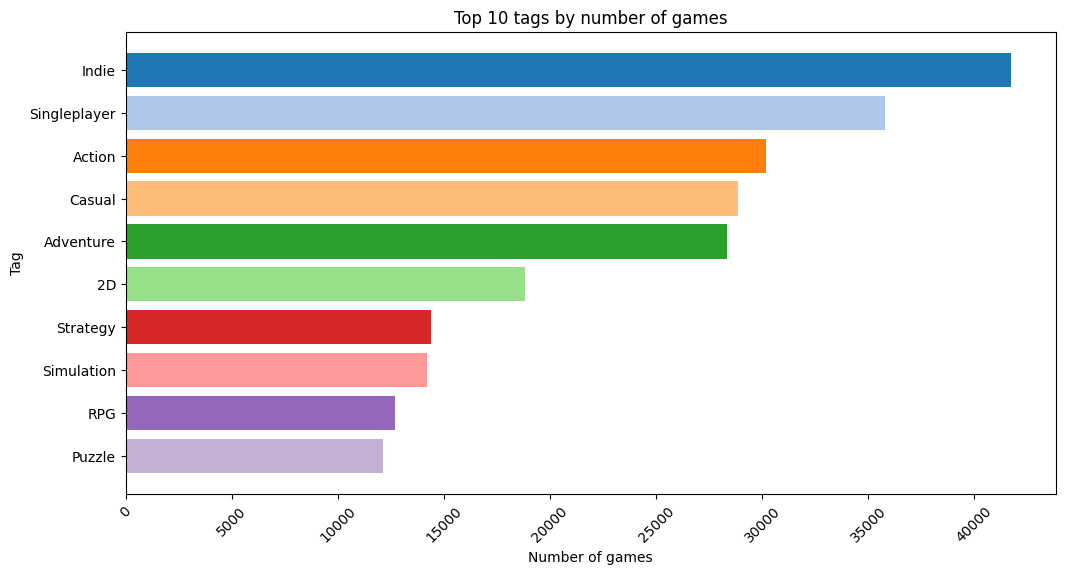

In [33]:
all_tags = []
df['tags'] = df['tags'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '')
for tags in df['tags']:
    all_tags.extend(tags.split(', '))
# Remove empty strings
all_tags = [tag for tag in all_tags if tag != '']
tag_counts = Counter(all_tags)
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_tags['Tag'], top_tags['Number of Games'], color=plt.cm.tab20.colors)
plt.title('Top 10 tags by number of games')
plt.ylabel('Tag')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

['0 - 20000' '50000 - 100000' '20000 - 50000' '200000 - 500000'
 '100000 - 200000' '2000000 - 5000000' '500000 - 1000000'
 '1000000 - 2000000' '20000000 - 50000000' '5000000 - 10000000'
 '10000000 - 20000000' '50000000 - 100000000' '100000000 - 200000000']


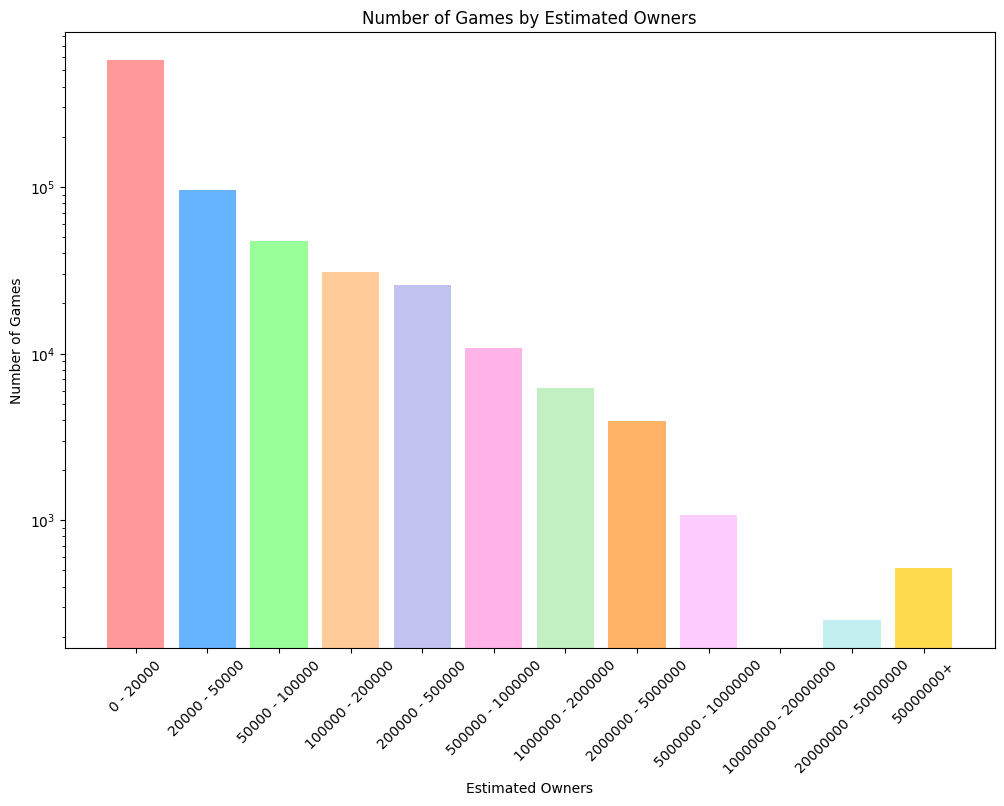

In [46]:
# Estimated units sold using log scale
print(df['estimated_owners'].unique())

# Define the ranges for estimated owners
bins = [0, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, float('inf')]
labels = {
    '0 - 20000': 0,
    '20000 - 50000': 0,
    '50000 - 100000': 0,
    '100000 - 200000': 0,
    '200000 - 500000': 0,
    '500000 - 1000000': 0,
    '1000000 - 2000000': 0,
    '2000000 - 5000000': 0,
    '5000000 - 10000000': 0,
    '10000000 - 20000000': 0,
    '20000000 - 50000000': 0,
    '50000000+': 0
}

# Iterate through the DataFrame to categorize the estimated owners
for index, row in df.iterrows():
    owners = row['estimated_owners']
    for i in range(len(bins) - 1):
        if owners == '50000000 - 100000000' or owners == '10000000 - 20000000':
            labels['50000000+'] += 1
        elif owners in labels:
            labels[owners] += 1


# Convert the dictionary to a DataFrame for plotting
owners_df = pd.DataFrame(list(labels.items()), columns=['Owners', 'Number of Games'])

# Set the color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb366',
          '#ffccff','#ff6666','#c2f0f0','#ffdb4d']

# Plotting the results using log scale
plt.figure(figsize=(12, 8))
plt.bar(owners_df['Owners'], price_ranges_df['Number of Games'], color=colors)
plt.yscale('log')
plt.xlabel('Estimated Owners')
plt.ylabel('Number of Games')
plt.title('Number of Games by Estimated Owners')
plt.xticks(rotation=45)
plt.show()


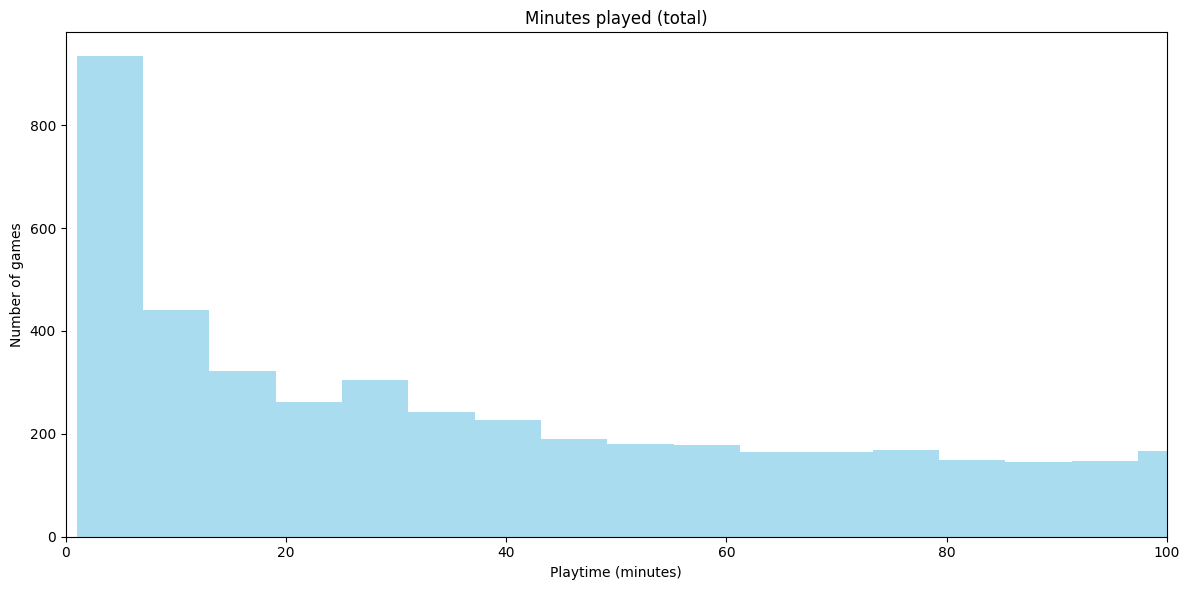

In [35]:
# Average playtime (excluding 0)
filtered_df = df[df['average_playtime_forever'] != 0]
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['average_playtime_forever'], bins=15000, color='skyblue', alpha=0.7)
plt.title('Minutes played (total)')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of games')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

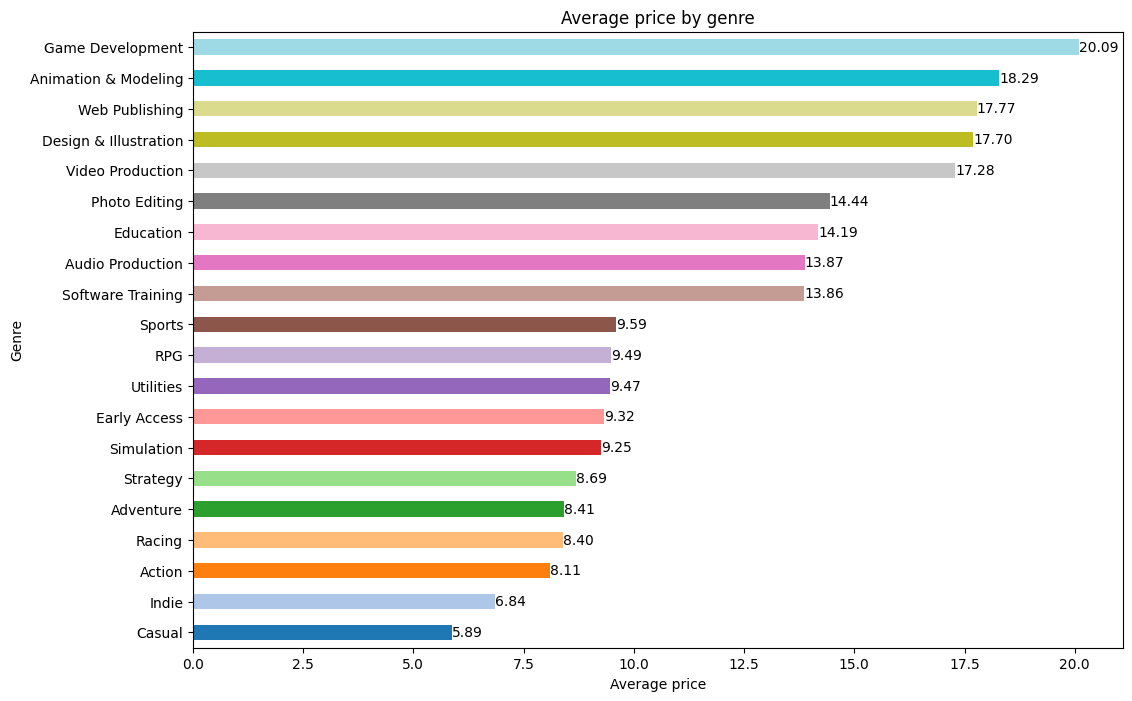

In [36]:
# Clean the genres column
df['genres'] = df['genres'].str.replace("'", '"')  # Replace single quotes with double quotes
df['genres'] = df['genres'].str.strip("[]")  # Remove brackets
df['genres'] = df['genres'].str.split(', ')  # Split by comma and space
exploded_df = df.explode('genres')
average_price_by_genre = exploded_df.groupby('genres')['price'].mean().sort_values()

# Limit to top 20 genres for better readability
top_genres = average_price_by_genre.tail(20)

plt.figure(figsize=(12, 8))
top_genres.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Average price by genre')
plt.xlabel('Average price')
plt.ylabel('Genre')

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Optionally, you can add text wrapping for long genre names
for index, value in enumerate(top_genres):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

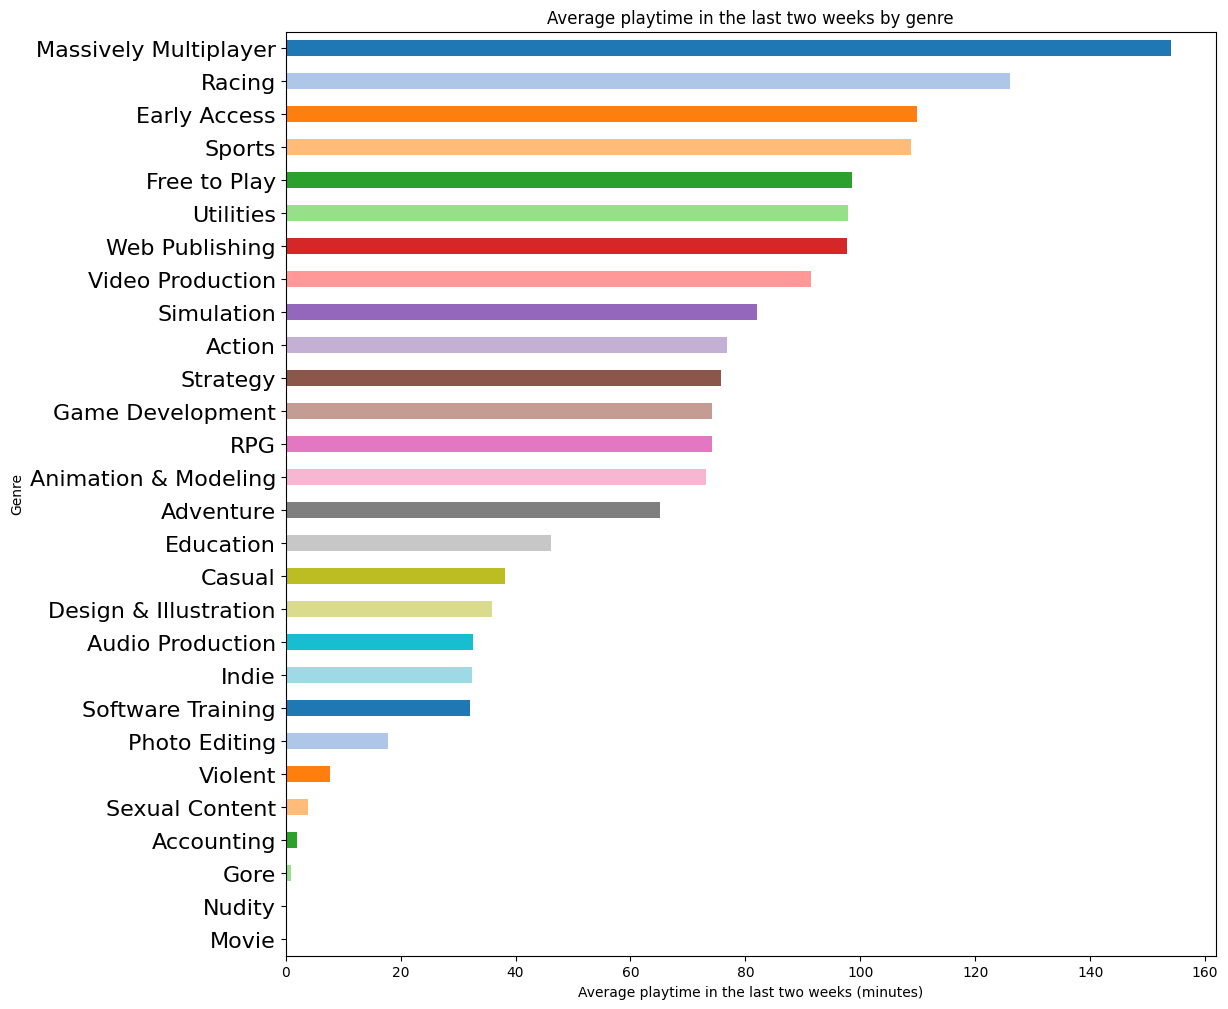

In [37]:
filtered_df = df[df['average_playtime_forever'] != 0]
df_expanded = filtered_df.explode('genres')
mean_playtimes = df_expanded.groupby('genres')['average_playtime_2weeks'].mean()
mean_playtimes_sorted = mean_playtimes.sort_values(ascending=False)
mean_playtimes_sorted.plot(kind='barh', figsize=(12, 12), color=plt.cm.tab20.colors)
plt.title('Average playtime in the last two weeks by genre')
plt.ylabel('Genre')
plt.xlabel('Average playtime in the last two weeks (minutes)')
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

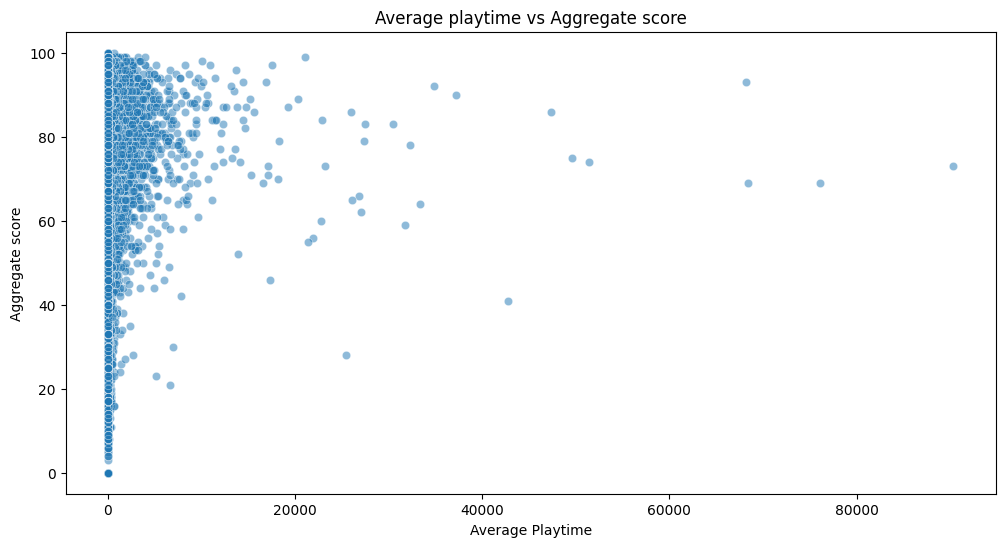

In [38]:
# Plot the relationship between price and aggregate_score to see if more expensive games tend to have higher or lower scores
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='average_playtime_forever', y='aggregate_score', alpha=0.5)
plt.title('Average playtime vs Aggregate score')
plt.xlabel('Average Playtime')
plt.ylabel('Aggregate score')
plt.show()


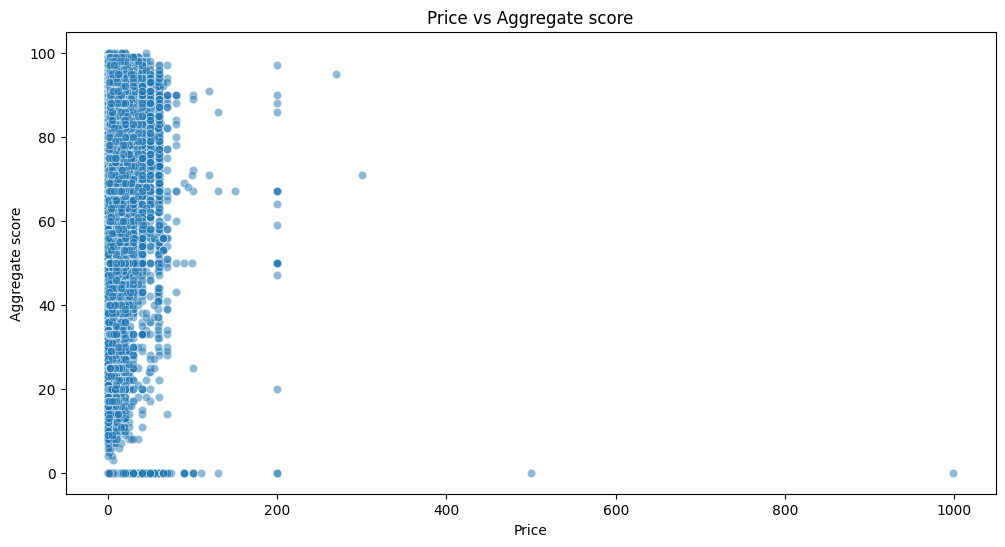

In [39]:
# Plot the relationship between price and aggregate_score to see if more expensive games tend to have higher or lower scores
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='aggregate_score', alpha=0.5)
plt.title('Price vs Aggregate score')
plt.xlabel('Price')
plt.ylabel('Aggregate score')
plt.show()


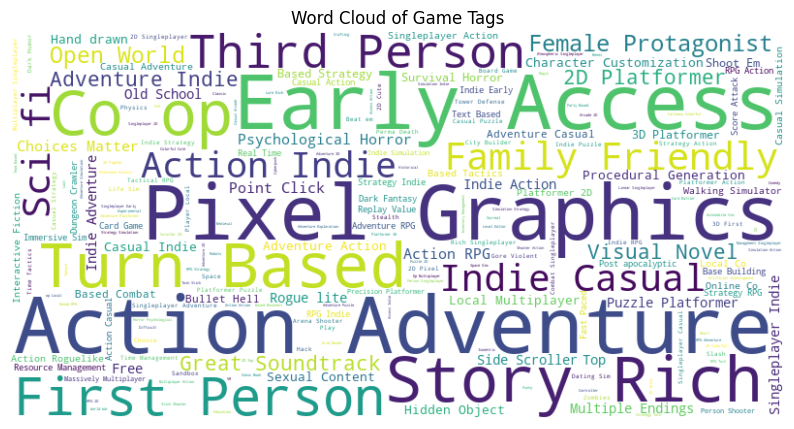

In [40]:
all_tags = " ".join(df['tags'].apply(lambda x: " ".join(x.strip("[]").replace("'", "").split(", "))).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Game Tags')
plt.show()

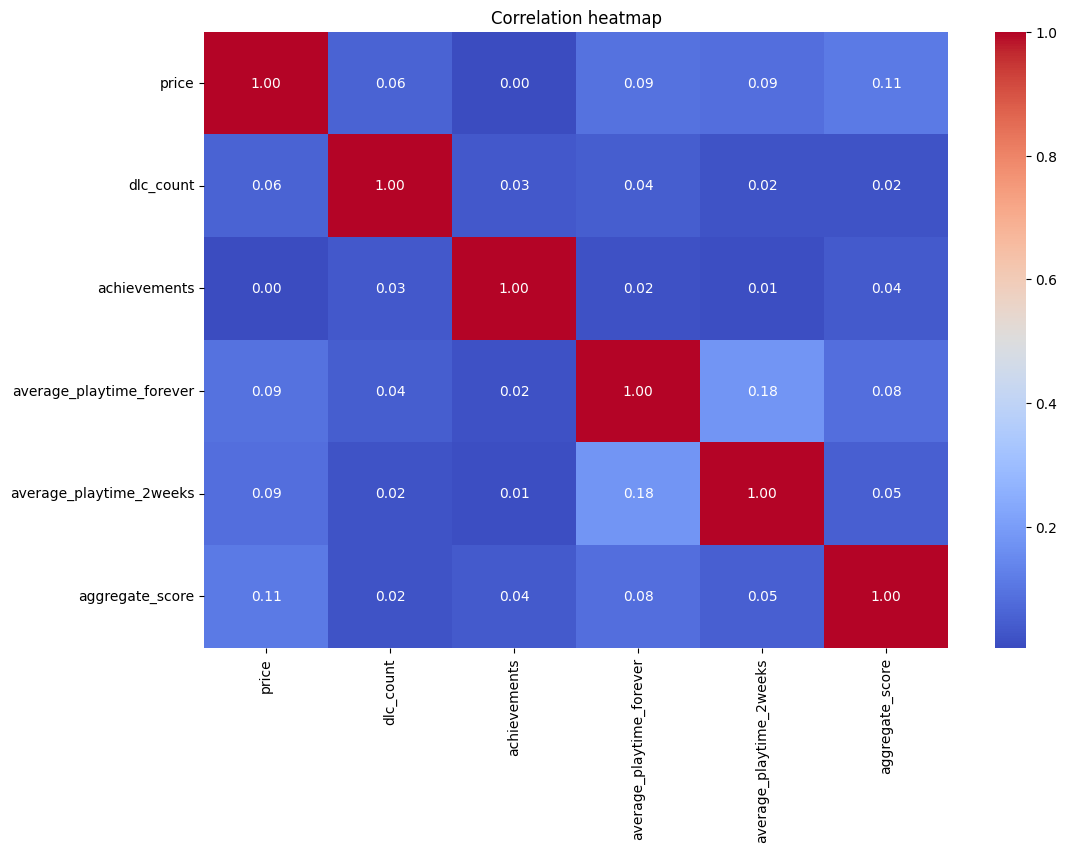

In [41]:
#Give a correlation heatmap of the numerical variables
# Get numeric cols from df
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.show()


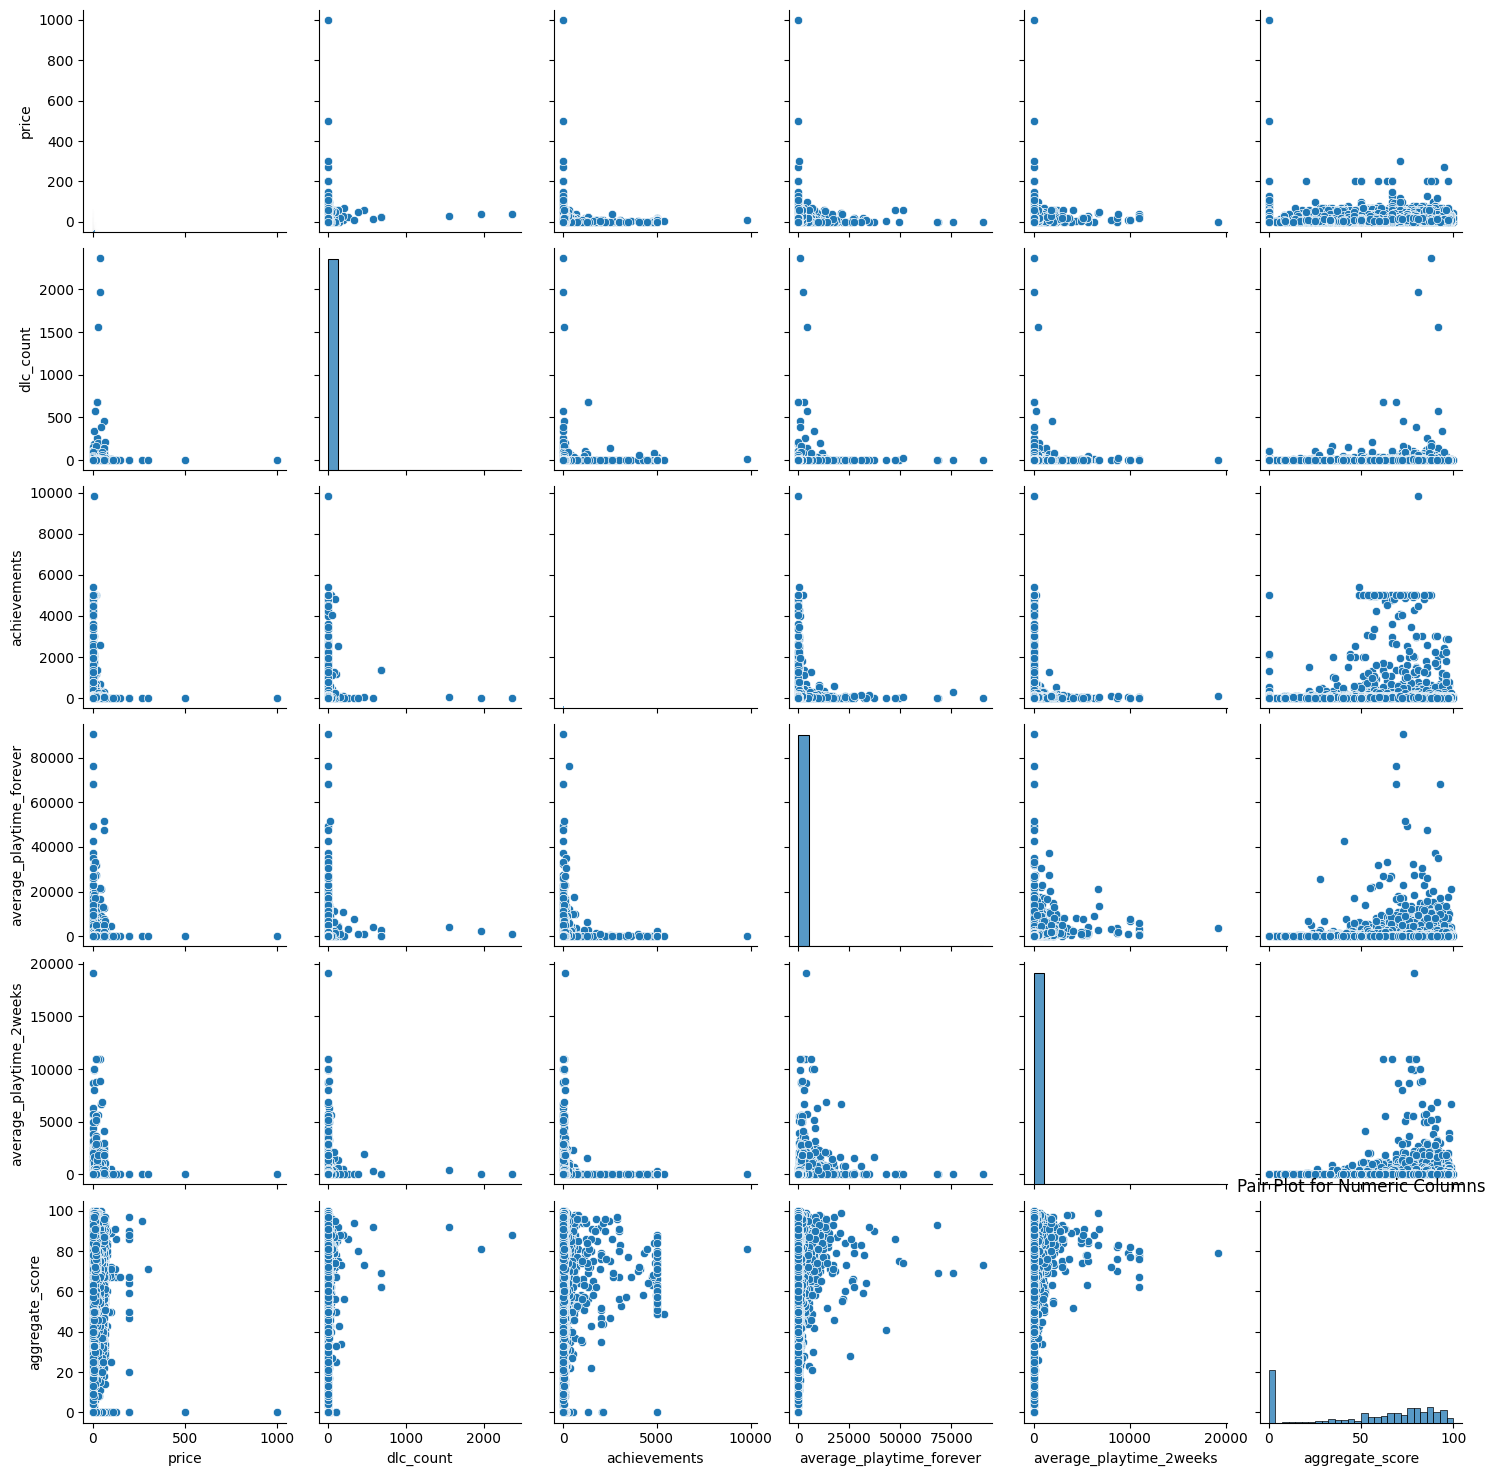

In [42]:
# Pair plot for all numeric columns
sns.pairplot(numeric_cols)
plt.title('Pair Plot for Numeric Columns')
plt.show()

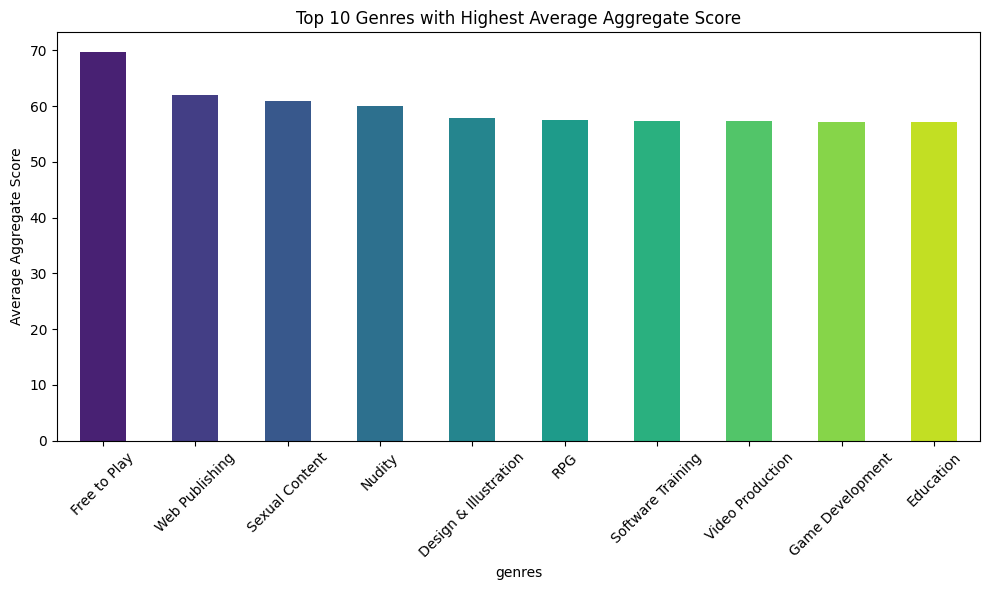

In [43]:
avg_score_per_genre = df.explode('genres').groupby('genres')['aggregate_score'].mean()
plt.figure(figsize=(10, 6))

# Use a color palette from Seaborn
colors = sns.color_palette("viridis", 10)  # You can choose any palette you like

# Plotting with specified colors
avg_score_per_genre.nlargest(10).plot(kind='bar', color=colors)

plt.title('Top 10 Genres with Highest Average Aggregate Score')
plt.ylabel('Average Aggregate Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

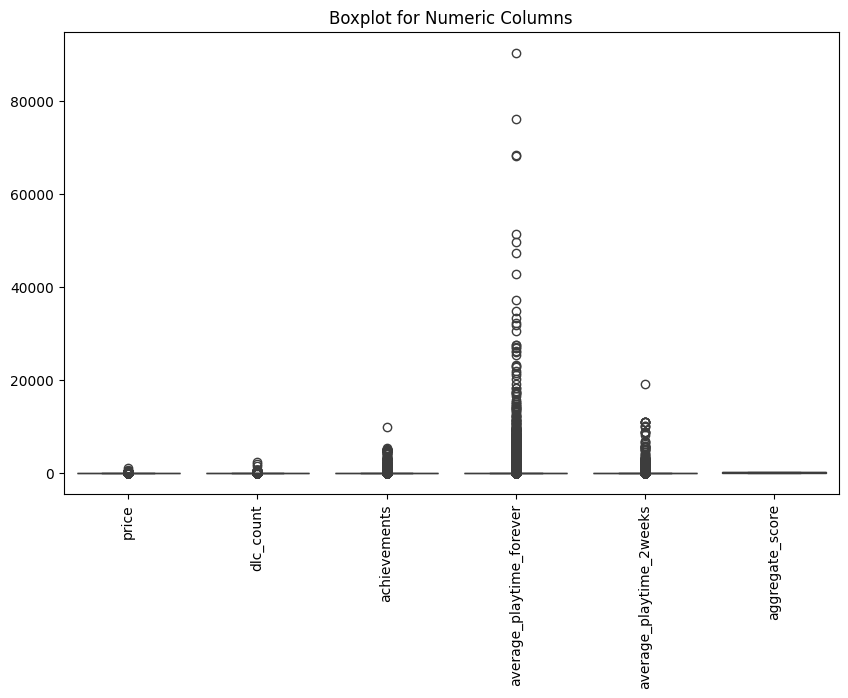

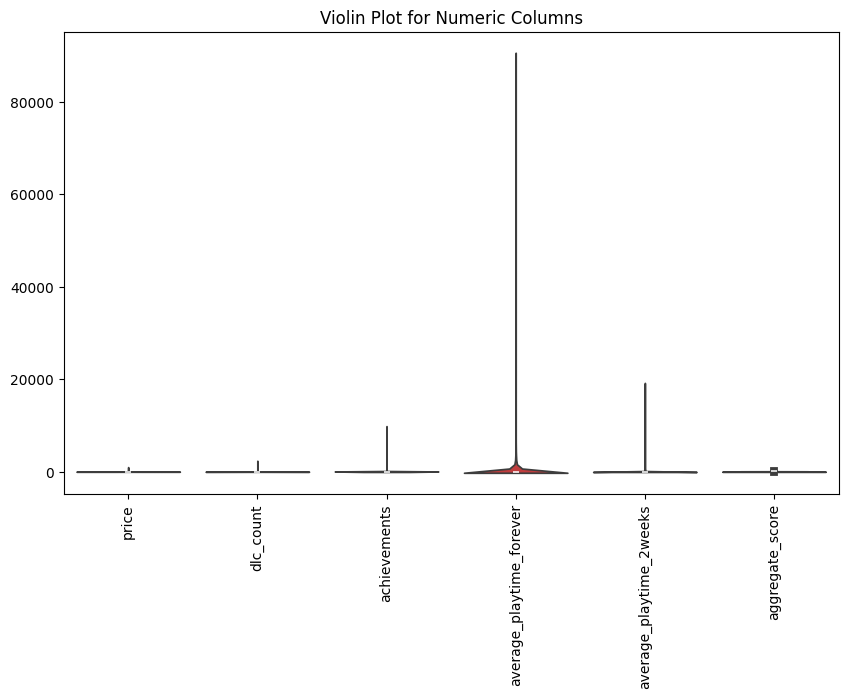

In [44]:
# Boxplot for all numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=numeric_cols)
plt.title('Violin Plot for Numeric Columns')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

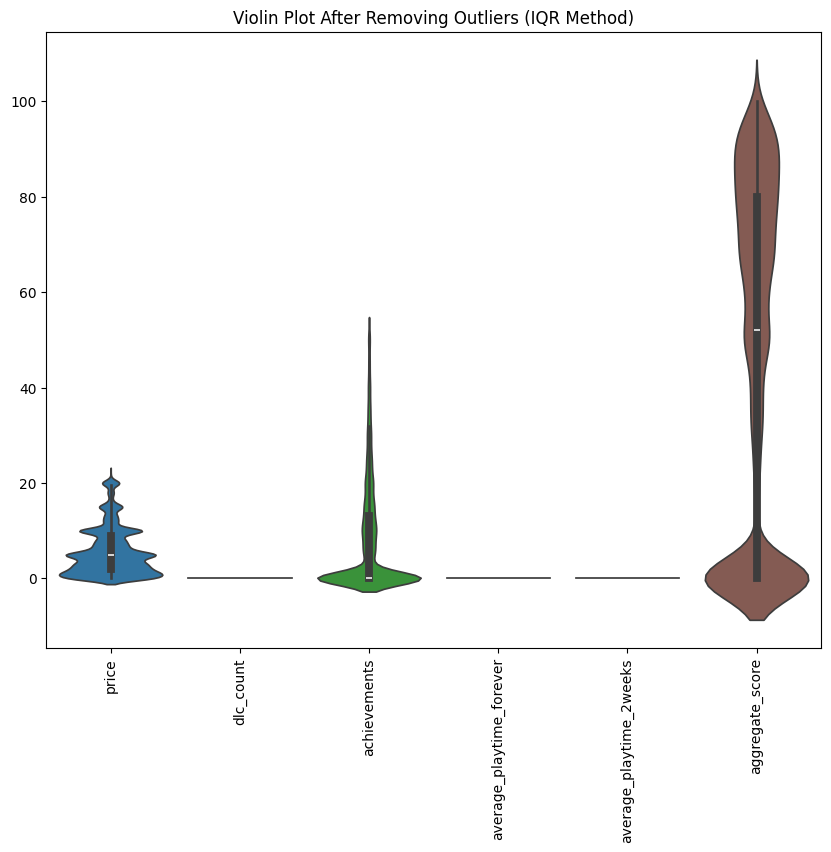

In [45]:
# Identify outliers using IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
cleaned_data = numeric_cols[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot again after removing outliers
plt.figure(figsize=(10, 8))
sns.violinplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.title("Violin Plot After Removing Outliers (IQR Method)")
plt.show()